# MHKiT WEC-Sim Example
The following example loads simulated data from a [WEC-Sim](http://wec-sim.github.io/WEC-Sim/index.html) run and demonstrates application of the [MHKiT wave module](https://mhkit-software.github.io/MHKiT/mhkit-python/api.wave.html) to interact with the simulated data of the [Reference Model 3 (RM3)](http://wec-sim.github.io/WEC-Sim/tutorials.html#two-body-point-absorber-rm3) two-body point absorber. 

 1. Load WEC-Sim Simulated Data
 2. Wave Class Data
 3. Body Class Data
 4. PTO Class Data
 5. Constraint Class Data
 6. Mooring Class Data
 7. Apply MHKiT Wave Module
 
Start by importing MHKiT and the necessary python packages (`scipy.io` and `matplotlib.pyplot`).

In [1]:
import mhkit
import scipy.io as sio
import matplotlib.pyplot as plt

## Load WEC-Sim Simulated Data
WEC-Sim saves output data as an output object, generated by WEC-Sim's [Response Class](http://wec-sim.github.io/WEC-Sim/api.html#response-class). 
WEC-Sim simulated data is provided, for this example we will load simulated data from a WEC-Sim run with a mooring matrix.

NOTE: The WEC-Sim output object must be converted to structure for use by `mhkit.wave.io.wecsim.read_output`. This can be done in MATLAB by using the following command: `output = struct(output);`.

In [2]:
# Select the WEC-Sim simulated data to load:
file_name = './data/wave/RM3MooringMatrix_matlabWorkspace_structure.mat' ## WEC-Sim run with Mooring

# Load WEC-Sim simulated data using `mhkit.wave.io.wecsim.read_output`
ws_output = mhkit.wave.io.wecsim.read_output(file_name)

# View the WEC-Sim output dictionary of dataFrames, it maintains a similar  format as the WEC-Sim output object
ws_output.keys()

moorDyn class not used
ptosim class not used


dict_keys(['wave', 'bodies', 'ptos', 'constraints', 'mooring', 'moorDyn', 'ptosim'])

## Wave Class Data
Data from WEC-Sim's [Wave Class](http://wec-sim.github.io/WEC-Sim/code_structure.html#wave-class) includes relevant information about the WEC-Sim run's wave input, including the the wave type, and wave elevation as a function of time. 

In [3]:
# Store WEC-Sim output from the Wave Class to a new dataFrame, called `wave`
wave = ws_output['wave']

# Display the wave type from the WEC-Sim Wave Class
display(wave.name)

# View the WEC-Sim output dataFrame for the Wave Class 
wave.head()

'etaImport'

,elevation
time,
0.00,-0.000000e+00
0.01,-2.766568e-07
0.02,-1.106006e-06
0.03,-2.486738e-06
0.04,-4.416811e-06


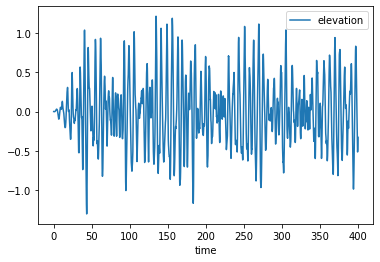

In [4]:
# Plot WEC-Sim output from the Wave Class
wave.plot()

## Body Class Data
Data from WEC-Sim's [Body Class](http://wec-sim.github.io/WEC-Sim/code_structure.html#body-class) includes relevant information about each body, including the body's position, velocity, acceleration, forces acting on the body, and the body's name. 

In [5]:
# Store WEC-Sim output from the Body Class to a new dictionary of dataFrames, i.e. `bodies`. 
bodies = ws_output['bodies']

# Data fron each body is stored as its own dataFrame, i.e. `body1` and `body2`.
bodies.keys()

dict_keys(['body1', 'body2'])

### Body Class Data for Body 1

In [6]:
# Display the name of Body 1 from the WEC-Sim Body Class
display(bodies['body1'].name)

# View the Body Class dataFrame for Body 1
bodies['body1'].head()

'float'

,position_dof1,velocity_dof1,acceleration_dof1,forceTotal_dof1,forceExcitation_dof1,forceRadiationDamping_dof1,forceAddedMass_dof1,forceRestoring_dof1,forceMorrisonAndViscous_dof1,forceLinearDamping_dof1,...,position_dof6,velocity_dof6,acceleration_dof6,forceTotal_dof6,forceExcitation_dof6,forceRadiationDamping_dof6,forceAddedMass_dof6,forceRestoring_dof6,forceMorrisonAndViscous_dof6,forceLinearDamping_dof6
time,,,,,,,,,,,,,,,,,,,,,
0.00,0.000000e+00,0.000000e+00,-2.289901e-10,0.000030,-0.000000,0.0,-0.000030,0.0,0,0,...,-0.0,0.0,0.0,-1.183390e-13,-0.000000e+00,0.0,1.183390e-13,0.0,0,0
0.01,-7.446282e-14,-1.823370e-11,-2.233675e-09,-0.000077,-0.000450,0.0,-0.000372,0.0,0,0,...,-0.0,0.0,0.0,-6.107105e-08,-3.182008e-11,0.0,6.103923e-08,0.0,0,0
0.02,-4.741700e-13,-6.908969e-11,-6.662860e-09,-0.000654,-0.001791,0.0,-0.001137,0.0,0,0,...,-0.0,0.0,0.0,-1.974080e-07,-1.268066e-10,0.0,1.972812e-07,0.0,0,0
0.03,-1.608208e-12,-1.666560e-10,-1.202573e-08,-0.001903,-0.004013,0.0,-0.002110,0.0,0,0,...,-0.0,0.0,0.0,-3.897245e-07,-2.841806e-10,0.0,3.894404e-07,0.0,0,0
0.04,-3.945373e-12,-3.078939e-10,-1.629590e-08,-0.004117,-0.007104,0.0,-0.002987,0.0,0,0,...,-0.0,0.0,0.0,-6.043663e-07,-5.030719e-10,0.0,6.038632e-07,0.0,0,0


### Plot heave position data for Body 1

max = -0.09745284609265781
min = -1.3264490463816792


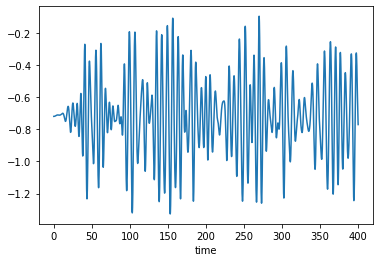

In [7]:
# Use Pandas to plot Body 1 position in heave (DOF 3)
bodies['body1'].position_dof3.plot()

# Use Pandas to calculate the maximum and minimum heave position of Body 1 
print("max =", bodies['body1'].position_dof3.max())
print("min =", bodies['body1'].position_dof3.min())

### Plot all position data for Body 1

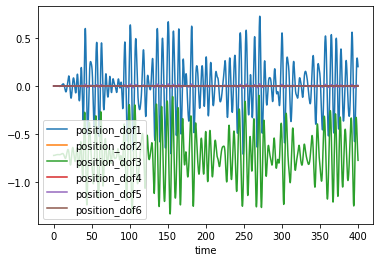

In [8]:
# Store Body Class dataFrame for Body 1 as `body1`. 
body1 = bodies['body1']

# Filter through Body 1 data columns that start with 'position'
filter_col = [col for col in body1 if col.startswith('position')]

# Plot filtered 'position' data for Body 1
body1[filter_col].plot()

### Body Class Data for Body 2

In [9]:
# Display the name of Body 2 from the WEC-Sim Body Class
display(bodies['body2'].name)

# View the Body Class dataFrame for Body 2
bodies['body2'].head()

'spar'

,position_dof1,velocity_dof1,acceleration_dof1,forceTotal_dof1,forceExcitation_dof1,forceRadiationDamping_dof1,forceAddedMass_dof1,forceRestoring_dof1,forceMorrisonAndViscous_dof1,forceLinearDamping_dof1,...,position_dof6,velocity_dof6,acceleration_dof6,forceTotal_dof6,forceExcitation_dof6,forceRadiationDamping_dof6,forceAddedMass_dof6,forceRestoring_dof6,forceMorrisonAndViscous_dof6,forceLinearDamping_dof6
time,,,,,,,,,,,,,,,,,,,,,
0.00,0.000000e+00,0.000000e+00,3.755267e-11,0.002335,0.000000,0.0,-0.002335,0.0,0,0,...,0.0,0.0,0.0,-0.000032,0.000000e+00,0.0,0.000032,0.0,0,0
0.01,1.591394e-14,3.896568e-12,4.658215e-10,0.003717,0.000114,0.0,-0.003603,0.0,0,0,...,0.0,0.0,0.0,-0.000049,3.542912e-11,0.0,0.000049,0.0,0,0
0.02,1.060269e-13,1.600502e-11,1.593218e-09,0.005343,0.000471,0.0,-0.004872,0.0,0,0,...,0.0,0.0,0.0,-0.000068,1.419347e-10,0.0,0.000068,0.0,0,0
0.03,3.850571e-13,4.276105e-11,3.369236e-09,0.006388,0.001097,0.0,-0.005291,0.0,0,0,...,0.0,0.0,0.0,-0.000079,3.198299e-10,0.0,0.000079,0.0,0,0
0.04,1.024419e-12,8.867530e-11,5.507640e-09,0.006671,0.002016,0.0,-0.004656,0.0,0,0,...,0.0,0.0,0.0,-0.000081,5.694090e-10,0.0,0.000081,0.0,0,0


### Plot all heave data for Body 2

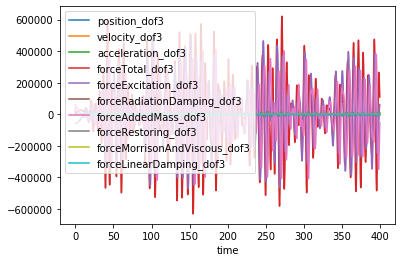

In [10]:
# Store Body Class dataFrame for Body 2 as`body2`. 
body2 = bodies['body2']

# Filter through Body 2 data columns that end with 'dof3'
filter_col = [col for col in body2 if col.endswith('dof3')]

# Plot filtered 'dof3' data for Body 2
body2[filter_col].plot()

## PTO Class Data
Data from WEC-Sim's [PTO Class](http://wec-sim.github.io/WEC-Sim/code_structure.html#pto-class) includes relevant information about each pto, including the pto's position, velocity, acceleration, forces acting on the pto, and the pto's name. 

In [11]:
# Store WEC-Sim output from the PTO Class to a dataFrame, called `ptos`
ptos = ws_output['ptos']

# Display the name of the PTO from the WEC-Sim PTO Class
display(ptos.name)

# View the PTO Class dataFrame
ptos.head()

'PTO1'

,position_dof1,velocity_dof1,acceleration_dof1,forceTotal_dof1,forceActuation_dof1,forceConstraint_dof1,forceInternalMechanics_dof1,powerInternalMechanics_dof1,position_dof2,velocity_dof2,...,forceInternalMechanics_dof5,powerInternalMechanics_dof5,position_dof6,velocity_dof6,acceleration_dof6,forceTotal_dof6,forceActuation_dof6,forceConstraint_dof6,forceInternalMechanics_dof6,powerInternalMechanics_dof6
time,,,,,,,,,,,,,,,,,,,,,
0.00,0.0,0.0,0.0,-0.000816,0,-0.000816,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0,0.000000e+00,0.0,0.0
0.01,0.0,0.0,0.0,-0.006888,0,-0.006888,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.203132e-11,0,3.203132e-11,0.0,0.0
0.02,0.0,0.0,0.0,-0.010638,0,-0.010638,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.222051e-07,0,1.222051e-07,0.0,0.0
0.03,0.0,0.0,0.0,-0.009266,0,-0.009266,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.338081e-07,0,3.338081e-07,0.0,0.0
0.04,0.0,0.0,0.0,-0.004708,0,-0.004708,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.821057e-07,0,5.821057e-07,0.0,0.0


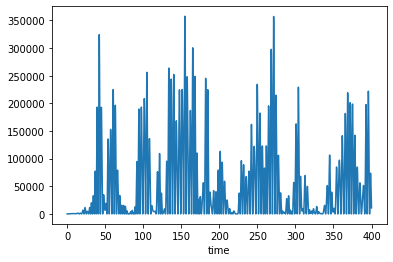

In [12]:
# Use Pandas to plot pto internal power in heave (DOF 3)
# NOTE: WEC-Sim requires a negative sign to convert internal power to generated power
(-1*ptos.powerInternalMechanics_dof3).plot()

## Constraint Class Data
Data from WEC-Sim's [Constraint Class](http://wec-sim.github.io/WEC-Sim/code_structure.html#constraint-class) includes relevant information about each constraint, including the constraint's position, velocity, acceleration, forces acting on the constraint, and the constraint's name. 

In [13]:
# Store WEC-Sim output from the Constraint Class to a new dataFrame, called `constraints`
constraints = ws_output['constraints']

# Display the name of the Constraint from the WEC-Sim Constraint Class
display(constraints.name)

# View the Constraint Class dataFrame
constraints.head()

'Constraint1'

,position_dof1,velocity_dof1,acceleration_dof1,forceConstraint_dof1,position_dof2,velocity_dof2,acceleration_dof2,forceConstraint_dof2,position_dof3,velocity_dof3,...,acceleration_dof4,forceConstraint_dof4,position_dof5,velocity_dof5,acceleration_dof5,forceConstraint_dof5,position_dof6,velocity_dof6,acceleration_dof6,forceConstraint_dof6
time,,,,,,,,,,,,,,,,,,,,,
0.00,0.000000e+00,0.000000e+00,-2.382255e-10,0.0,0.0,0.0,0.0,-0.000000,0.000000e+00,0.000000,...,0.0,-3.635975,-0.000000e+00,-0.000000e+00,-1.282689e-11,-0.0,0.0,0.0,0.0,1.540744e-33
0.01,-7.759426e-14,-1.900049e-11,-2.327209e-09,0.0,0.0,0.0,0.0,0.001198,1.828372e-07,0.000039,...,0.0,-3.325131,-4.349218e-15,-1.064979e-12,-1.299084e-10,-0.0,0.0,0.0,0.0,3.168962e-05
0.02,-4.942730e-13,-7.203812e-11,-6.948924e-09,0.0,0.0,0.0,0.0,0.002494,8.204026e-07,0.000091,...,0.0,-2.984497,-2.792093e-14,-4.095030e-12,-3.973089e-10,-0.0,0.0,0.0,0.0,6.653120e-05
0.03,-1.677272e-12,-1.739121e-10,-1.255915e-08,0.0,0.0,0.0,0.0,0.003245,2.036965e-06,0.000154,...,0.0,-2.781651,-9.592229e-14,-1.007782e-11,-7.408551e-10,-0.0,0.0,0.0,0.0,8.740991e-05
0.04,-4.117570e-12,-3.216346e-10,-1.705138e-08,0.0,0.0,0.0,0.0,0.003345,3.906279e-06,0.000220,...,0.0,-2.746376,-2.391623e-13,-1.908418e-11,-1.049257e-09,-0.0,0.0,0.0,0.0,9.123985e-05


### Plot all constraint force data

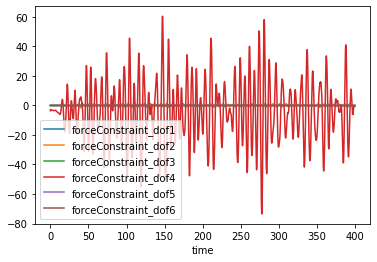

In [14]:
# Filter through the Constraint data columns that start with 'forceConstraint'
filter_col = [col for col in constraints if col.startswith('forceConstraint')]

# Plot filtered 'forceConstraint' data for the Constraint
constraints[filter_col].plot()

## Mooring Class Data
Data from WEC-Sim's [Mooring Class](http://wec-sim.github.io/WEC-Sim/code_structure.html#mooring-class) includes relevant information about the mooring, including the mooring's position, velocity, mooring force, and the mooring's name. 

In [15]:
# Store WEC-Sim output from the Mooring Class to a new dataFrame, called `mooring`
mooring = ws_output['mooring']

# View the PTO Class dataFrame
mooring.head()

,position_dof1,velocity_dof1,forceMooring_dof1,position_dof2,velocity_dof2,forceMooring_dof2,position_dof3,velocity_dof3,forceMooring_dof3,position_dof4,velocity_dof4,forceMooring_dof4,position_dof5,velocity_dof5,forceMooring_dof5,position_dof6,velocity_dof6,forceMooring_dof6
time,,,,,,,,,,,,,,,,,,
0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,-0.000000e+00,-0.000000e+00,0.0,0.0,0.0,0.0
0.01,-7.759426e-14,-1.900049e-11,7.759426e-09,0.0,0.0,0.0,1.828372e-07,0.000039,0.0,0.0,0.0,0.0,-4.349218e-15,-1.064979e-12,0.0,0.0,0.0,0.0
0.02,-4.942730e-13,-7.203812e-11,4.942730e-08,0.0,0.0,0.0,8.204026e-07,0.000091,0.0,0.0,0.0,0.0,-2.792093e-14,-4.095030e-12,0.0,0.0,0.0,0.0
0.03,-1.677272e-12,-1.739121e-10,1.677272e-07,0.0,0.0,0.0,2.036965e-06,0.000154,0.0,0.0,0.0,0.0,-9.592229e-14,-1.007782e-11,0.0,0.0,0.0,0.0
0.04,-4.117570e-12,-3.216346e-10,4.117570e-07,0.0,0.0,0.0,3.906279e-06,0.000220,0.0,0.0,0.0,0.0,-2.391623e-13,-1.908418e-11,0.0,0.0,0.0,0.0


### Plot all mooring force data

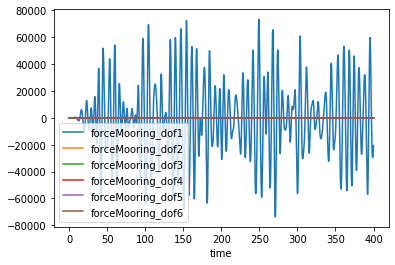

In [16]:
# Filter through the Mooring data columns that start with 'forceMooring'
filter_col = [col for col in mooring if col.startswith('forceMooring')]

# Plot filtered 'forceMooring' data for the Mooring
mooring[filter_col].plot()

# Apply MHKiT Wave Module

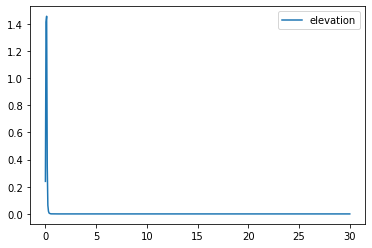

In [17]:
# Use the MHKiT Wave Module to calculate wave spectrum from the WEC-Sim Wave Class Data, called `wave`
ws_spectrum = mhkit.wave.resource.elevation_spectrum(wave,60,1000)

# Plot calcualed wave Spectrum
ws_spectrum.plot()

In [18]:
# Calculate Peak Wave Period (Tp) and Significant Wave Height(Hm0)
Tp = mhkit.wave.resource.peak_period(ws_spectrum)
Hm0 = mhkit.wave.resource.significant_wave_height(ws_spectrum)

# Display calculated Peak Wave Period (Tp) and Significant Wave Height(Hm0)
display(Tp,Hm0)

,Tp
elevation,8.333333


,Hm0
elevation,1.785851
